In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload the original full dataset.

data = pd.read_csv('mlb 1972-2021.csv')

In [ ]:
# Check for any missing values. In this case, there are none. 

null_count = data.isnull().sum()
null_count

Tm          0
Year        0
#Bat        0
BatAge      0
G           0
           ..
#a-tA-S     0
1Run        0
Under500    0
SOS         0
W-L%        0
Length: 80, dtype: int64

In [ ]:
# A preview of the dataset. 

data.head()

,Tm,Year,#Bat,BatAge,G,PA,AB,R/G,H,2B,...,Fld%,Rtot,Rtot/yr,BPF,PPF,#a-tA-S,1Run,Under500,SOS,W-L%
0,Atlanta Braves,1972,36,27.2,155,38.316129,34.051613,4.05,8.793548,1.200000,...,0.974,-38,-4,109,109,13,0.536,0.458,0.1,0.455
1,Baltimore Orioles,1972,32,28.7,154,36.857143,32.649351,3.37,7.487013,1.253247,...,0.983,78,8,103,100,17,0.448,0.448,0.0,0.519
2,Boston Red Sox,1972,38,28.9,155,37.883871,33.600000,4.13,8.316129,1.477419,...,0.978,-43,-4,106,105,19,0.579,0.445,0.0,0.548
3,California Angels,1972,40,29.1,155,36.387097,33.322581,2.93,8.058065,1.103226,...,0.981,8,1,94,95,12,0.567,0.361,0.0,0.484
4,Chicago Cubs,1972,41,30.0,156,38.147436,33.634615,4.39,8.628205,1.320513,...,0.979,-25,-2,110,109,16,0.449,0.551,-0.1,0.548


In [ ]:
# Team and Year variables will not be selected as part of the final dataset as they are irrelevant to the research. 
# The target variable, W-L% (Win/Loss Percentage) will be temporarily removed for the upcoming analysis. 

mlbdata = data.iloc[:, 2:79]
mlbdata.head()

,#Bat,BatAge,G,PA,AB,R/G,H,2B,3B,HR,...,DP,Fld%,Rtot,Rtot/yr,BPF,PPF,#a-tA-S,1Run,Under500,SOS
0,36,27.2,155,38.316129,34.051613,4.05,8.793548,1.200000,0.109677,0.929032,...,0.838710,0.974,-38,-4,109,109,13,0.536,0.458,0.1
1,32,28.7,154,36.857143,32.649351,3.37,7.487013,1.253247,0.188312,0.649351,...,0.974026,0.983,78,8,103,100,17,0.448,0.448,0.0
2,38,28.9,155,37.883871,33.600000,4.13,8.316129,1.477419,0.219355,0.800000,...,0.909677,0.978,-43,-4,106,105,19,0.579,0.445,0.0
3,40,29.1,155,36.387097,33.322581,2.93,8.058065,1.103226,0.167742,0.503226,...,0.870968,0.981,8,1,94,95,12,0.567,0.361,0.0
4,41,30.0,156,38.147436,33.634615,4.39,8.628205,1.320513,0.256410,0.852564,...,0.948718,0.979,-25,-2,110,109,16,0.449,0.551,-0.1


In [ ]:
# 'G' variable (number of games played per season) will be dropped, as the majority of the feature variables are averaged by this number.
# 'cSho' and 'tSho' variables (Complete game shutout and team shut out, respectively) are also dropped to eliminate bias. 
# A shutout results in a win 100% of the time. 

mlbdata = mlbdata.drop(['G','cSho','tSho'],axis=1)

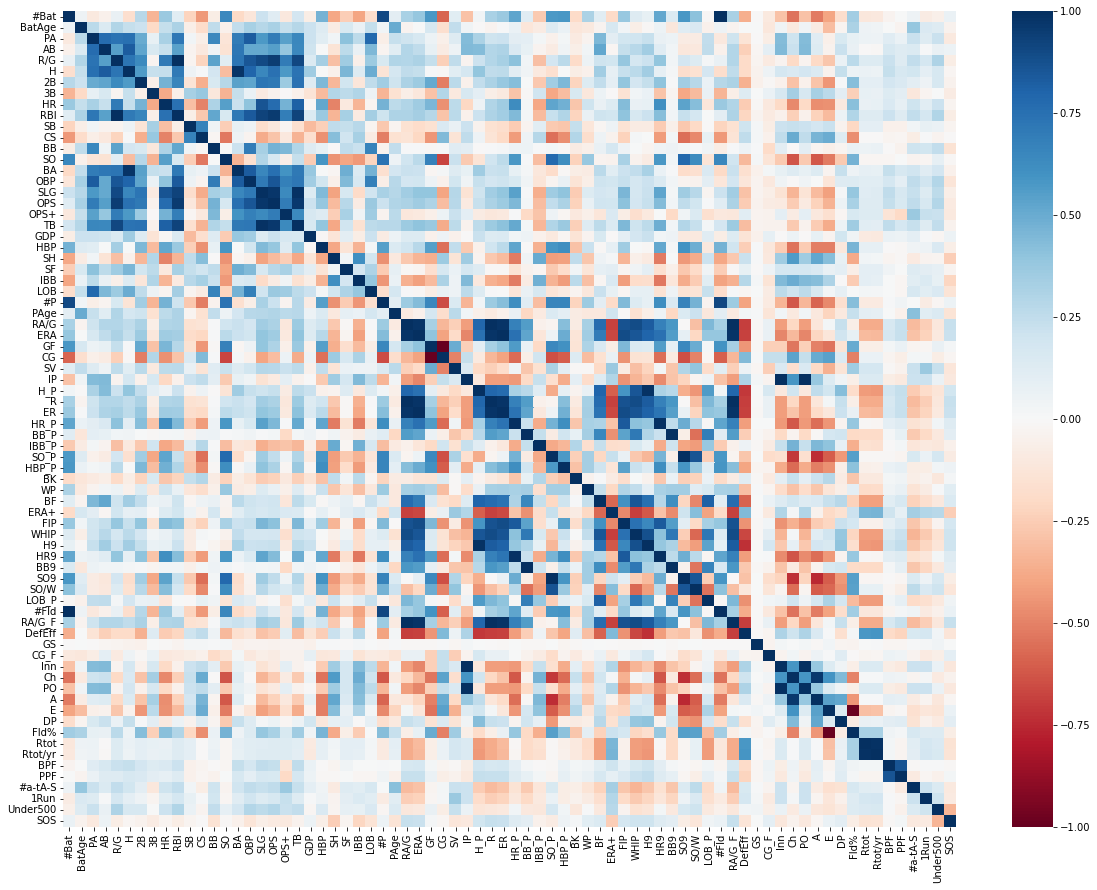

In [ ]:
corr = mlbdata.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1)

In [ ]:
# All highly correlated features with a correlation coefficient greater than 0.80 plus or minus will be removed from the dataset. 

corr_matrix = corr
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80) or any(upper_tri[column] < -0.80)]

In [ ]:
# The following list contains all of the feature variables with strong pairwise correlation.

for i in to_drop:
  print(i)

H
RBI
BA
OBP
SLG
OPS
TB
#P
ERA
CG
R
ER
BF
FIP
WHIP
H9
HR9
BB9
SO9
SO/W
LOB_P
#Fld
RA/G_F
Inn
PO
A
Fld%
Rtot/yr
PPF


In [ ]:
# The above variables will be dropped from the dataset.

for i in to_drop:
  mlbdata = mlbdata.drop([i],axis=1)

In [ ]:
# The dataset has been reduced to 45 feature variables from the original count of 79. 

mlbdata.head()

,#Bat,BatAge,PA,AB,R/G,2B,3B,HR,SB,CS,...,CG_F,Ch,E,DP,Rtot,BPF,#a-tA-S,1Run,Under500,SOS
0,36,27.2,38.316129,34.051613,4.05,1.200000,0.109677,0.929032,0.303226,0.225806,...,7.380645,38.193548,1.006452,0.838710,-38,109,13,0.536,0.458,0.1
1,32,28.7,36.857143,32.649351,3.37,1.253247,0.188312,0.649351,0.506494,0.266234,...,7.155844,38.090909,0.649351,0.974026,78,103,17,0.448,0.448,0.0
2,38,28.9,37.883871,33.600000,4.13,1.477419,0.219355,0.800000,0.425806,0.193548,...,7.580645,37.967742,0.838710,0.909677,-43,106,19,0.579,0.445,0.0
3,40,29.1,36.387097,33.322581,2.93,1.103226,0.167742,0.503226,0.367742,0.238710,...,7.245161,37.761290,0.735484,0.870968,8,94,12,0.567,0.361,0.0
4,41,30.0,38.147436,33.634615,4.39,1.320513,0.256410,0.852564,0.442308,0.301282,...,7.410256,39.852564,0.846154,0.948718,-25,110,16,0.449,0.551,-0.1


In [ ]:
# The remaining variables will be normalized through Min-Max Normalization to rescale the range of features for low variance analysis.

mlbdatanorm = pd.DataFrame(mlbdata)
mlbdatanormal = (mlbdatanorm - mlbdatanorm.min()) / (mlbdatanorm.max()-mlbdatanorm.min())

In [ ]:
# The variance of the feature variables is analyzed to explore the need for further dimensionality reduction.

variance = mlbdatanormal.var()
varianceScore = pd.DataFrame(variance.values)
varianceColumn = pd.DataFrame(variance.index)

varianceDF = pd.concat([varianceColumn,varianceScore], axis=1)
varianceDF.columns = ['Feature','Variance']
pd.set_option('display.max_rows', None)

varianceDF.sort_values(by='Variance', ascending=True)

,Feature,Variance
34,GS,0.000534
30,BK,0.006901
23,IP,0.009247
3,AB,0.010397
17,IBB,0.012450
40,BPF,0.012871
2,PA,0.014751
8,SB,0.015078
33,DefEff,0.017971
36,Ch,0.018299


In [ ]:
# The 'GS' variable (number of games started on defense) will be dropped from the dataset due to the extremely low variance. 
# The number of games started on defense remains essentially unchanged throughout the entire dataset.

mlbdata = mlbdata.drop(['GS'], axis=1)

In [ ]:
# The target variable is inserted back into the revised dataset. 

mlbdata.insert(44,'W-L%',data['W-L%'])

In [ ]:
# After dimensionality reduction, the final working dataset consists of 44 feature variables and 1 target variable. 

mlbdata.head()

,#Bat,BatAge,PA,AB,R/G,2B,3B,HR,SB,CS,...,Ch,E,DP,Rtot,BPF,#a-tA-S,1Run,Under500,SOS,W-L%
0,36,27.2,38.316129,34.051613,4.05,1.200000,0.109677,0.929032,0.303226,0.225806,...,38.193548,1.006452,0.838710,-38,109,13,0.536,0.458,0.1,0.455
1,32,28.7,36.857143,32.649351,3.37,1.253247,0.188312,0.649351,0.506494,0.266234,...,38.090909,0.649351,0.974026,78,103,17,0.448,0.448,0.0,0.519
2,38,28.9,37.883871,33.600000,4.13,1.477419,0.219355,0.800000,0.425806,0.193548,...,37.967742,0.838710,0.909677,-43,106,19,0.579,0.445,0.0,0.548
3,40,29.1,36.387097,33.322581,2.93,1.103226,0.167742,0.503226,0.367742,0.238710,...,37.761290,0.735484,0.870968,8,94,12,0.567,0.361,0.0,0.484
4,41,30.0,38.147436,33.634615,4.39,1.320513,0.256410,0.852564,0.442308,0.301282,...,39.852564,0.846154,0.948718,-25,110,16,0.449,0.551,-0.1,0.548


In [ ]:
# Save the new dataset to .csv format.

mlbdata.to_csv("mlbdata.csv")